## Qubits and Gates: Intro to Quantum Computing

Learning Objectives:
- [X] What and why of Quantum Computing.
- [ ] Represent |0⟩ and |1⟩ states as vectors
- [ ] Understand Hadamard and Pauli gates
- [ ] See how gates transform states (matrix × vector)
- [ ] Simulate manually with NumPy first, then Qiskit


What is Quantum Computing and why Quantum Computers over Classical?

Quantum Computer is a special type of computer where, instead of regular bits, you have Qubits which can be in more than one state at once and then, upon observation or wave collapse, be resolved into either 0 or 1. The quantum algorithms developed for such computers use the concept of superposition and other quantum properties to enhance functionalities like search, validation, and cryptography that cannot currently be achieved with a classical computer.

As previously mentioned, due to certain quantum properties of qubits, some algorithms perform exponentially faster compared to their classical alternatives, like Grover's search algorithm and so on. Even though this field is still in its infancy, it threatens the entirety of past cryptography standards. For example, with the rise of quantum computers, cybersecurity has started to move away from RSA and elliptic curve cryptography (ECC). Quantum Computing experts are now working on better “uncrackable” options, known as quantum-resistant or post-quantum cryptography, that even a much more sophisticated quantum computer cannot crack. Once we have fewer errors per qubit, more stability, and a larger number of affordable qubits, there will be countless use cases for quantum computers — from the field of pharma (trying different combinations to create the perfect chemical compound or medicine), to the field of cryptography, biology (testing millions of DNA combinations), cosmology/astronomy (identifying deep space objects), and so much more.

What is a Qubit? How are |0⟩ and |1⟩ states represented as vectors?
A Qubit, short for quantum bit, is the basic unit of information on a Quantum Computer like a bit is for its classical counterpart. [Quantum bit are generally created by measuring quantum particles](https://www.ibm.com/think/topics/qubit). The quantum particles are the smalles building blocks of the Universe and can be such as photons, electrons, <abbr title="In the context of quantum computing, the term usually refers to an ion that is confined in an ion trap (like a Paul trap or Penning trap) and cooled to near absolute zero using lasers (laser cooling). This isolation from the environment is critical for maintaining their fragile quantum properties, making them one of the leading physical systems used to build a qubit.">trapped ions</abbr>, superconducting circuits and atoms. A bit can either be 1 or 0, whereas a <abbr title="On the quantum level, qubit probability is measured as a wave function. The probability amplitude of a qubit can be used to encode more than one bit of data and carry out extremely complex calculations when combined with other qubits.">Qubit</abbr> has three states; it can be either 1 or 0 or in a superposition of between 0 and 1 at the same time.
Qubit is represented as:
|0⟩ and |1⟩, where $$ \mathbf{|0⟩} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} \text{ and } \mathbf{|1⟩} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$

In [1]:
# Imports
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, circuit_drawer
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np


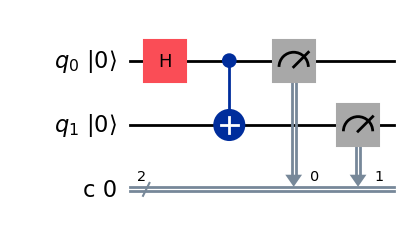

In [2]:
# Example quantum circuit -- basics

# Create a quantum circuit with 2 qubits and 2 classical bits
# (classical bits are for measurement results)
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate to qubit 0 (puts it in superposition)
qc.h(0)

# Apply a CNOT (controlled-NOT) gate with qubit 0 as control and qubit 1 as target
# This entangles the two qubits
qc.cx(0, 1)

# Measure both qubits and map the results to classical bits
qc.measure([0, 1], [0, 1])

# Draw the circuit
# output='mpl' uses matplotlib for a nicer render, 'text' is for console
# You can also use 'latex_source' to get the LaTeX code for the circuit (requires pdflatex)
qc.draw('mpl', initial_state=True)



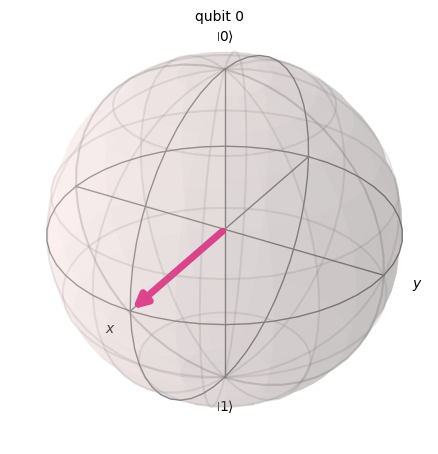

In [3]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# 1. Define a quantum state vector (e.g., the |+> state)
# This state is 50% |0> and 50% |1>
plus_state = Statevector([1/2**0.5, 1/2**0.5])

# 2. Plot the state on the Bloch Sphere
# The coordinates will be (x=1, y=0, z=0)
plot_bloch_multivector(plus_state)

### Bell Circuit

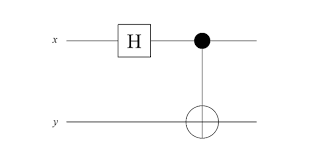
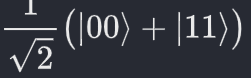

{'00': 525, '11': 499}


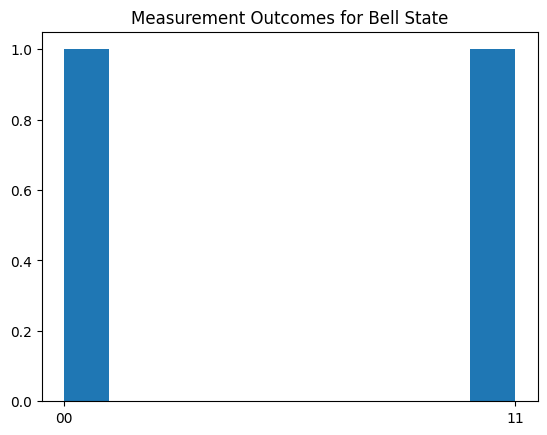

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
# x , y, Hadamard gate, C-NOT
def create_bell_state(shots=1000):
    """
    Create and measure a Bell state (|00> + |11>) / sqrt(2).
    """
    # Quantum circuit with 2 qubits for simulation, 2 classical bits for measurement and output
    qc = QuantumCircuit(2, 2)
    # Step 1: Applying Hadamard (H) gate on qubit 0 --> creates a superposition 
    qc.h(0)
    # Step 2: CNOT (control=0, target=1)
    qc.cx(0, 1)
    # Step 3: Measure both qubits
    qc.measure([0, 1], [0, 1])

    simulator = AerSimulator()
    transpiled = transpile(qc, simulator)
    job  = simulator.run(transpiled)
    result = job.result()
    counts = result.get_counts(qc)
    return counts, qc 

def plot_bell_counts(counts):
    """Plot the measurement outcomes of the Bell state."""
    plt.hist(counts)
    plt.title("Measurement Outcomes for Bell State")
    plt.show()

bell = create_bell_state(1000)
print(bell[0])
plot_bell_counts(bell[0])

In the output above, the probability is roughly the same meaning the qubits have been entangled. Measuring one qubit as 0 forces the other to be 0 and if it's 1 the other has to be 1.  

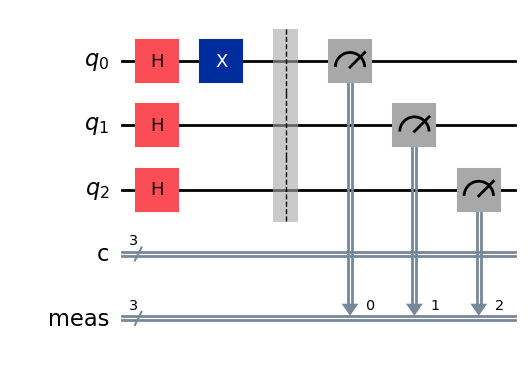

In [5]:
# Create a Uniform Superposition on 3 qubits (all H gates).

from qiskit import QuantumCircuit

qc = QuantumCircuit(3,3)
n = 3 # qubits
for i in range(n):
    qc.h(i)

print(qc.x(0))
qc.measure_all()
qc.draw('mpl')

{$q_o,q_1, q_2$} are three qubits each being passed through a Hadamard gate.The action of the Hadamard gate (H) on a single $|0\rangle$ qubit is:

$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

However, applying the H gate on a single $|1\rangle$ qubit is:

$$
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

So, if $|0\rangle |1\rangle$ passed through H gate, multiplying the two together:

$$
H|0 \rangle|1\rangle = \frac{1}{2}(|0\rangle + |1\rangle)(|0\rangle - |1\rangle) 
$$

# Deutsch Josza Algorithm


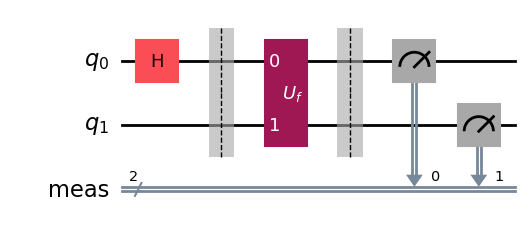

In [6]:
# Step 1: Map
 
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
 
 
def twobit_function(case: int):
    """
    Generate a valid two-bit function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")
 
    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f
 
 
# first, convert oracle circuit (above) to a single gate for drawing purposes. otherwise, the circuit is too large to display
# blackbox = twobit_function(2).to_gate()  # you may edit the number inside "twobit_function()" to select among the four valid functions
# blackbox.label = "$U_f$"
 
qc.h(0)
qc.barrier()
# first, convert oracle circuit (above) to a single gate for drawing purposes. otherwise, the circuit is too large to display
blackbox = twobit_function(2).to_gate()  # you may edit the number inside "twobit_function()" to select among the four valid functions
blackbox.label = "$U_f$"
qc.compose(blackbox, inplace=True)
qc.measure_all()
 
 
qc.draw("mpl")

In [7]:
simulator = AerSimulator()
transpiled = transpile(qc, simulator)
job  = simulator.run(transpiled, shots=4)
result = job.result()
print(result)
counts = result.results[0].data.counts

Result(backend_name='aer_simulator', backend_version='0.17.2', job_id='7fd3484e-bdf3-40db-88ff-b0a6727dd118', success=True, results=[ExperimentResult(shots=4, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 2, '0x3': 2}), header={'creg_sizes': [['meas', 2]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit-50', 'qreg_sizes': [['q', 2]], 'metadata': {}}, status=DONE, seed_simulator=2294700894, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0008306, 'sample_measure_time': 7.6e-06, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 15885, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}, time_taken=0.0008306)], date=2025-11-02T09:22:41.343670, st

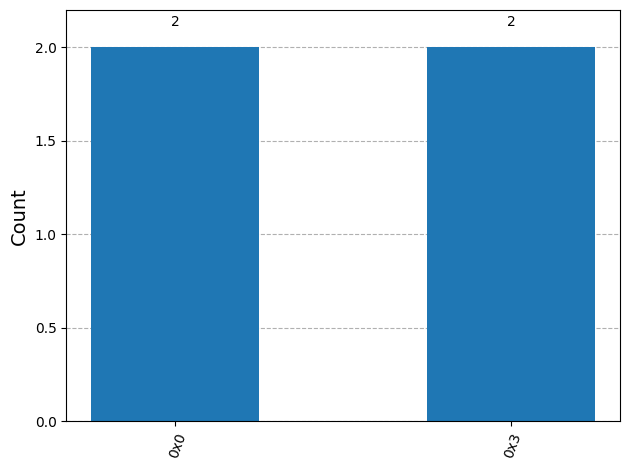

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

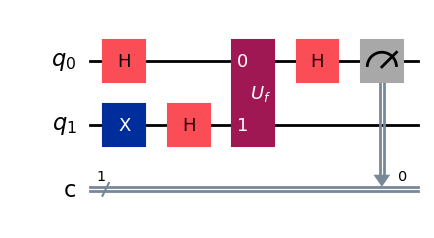

Function is likely: **Constant**
Measurement Counts: {'0': 2}


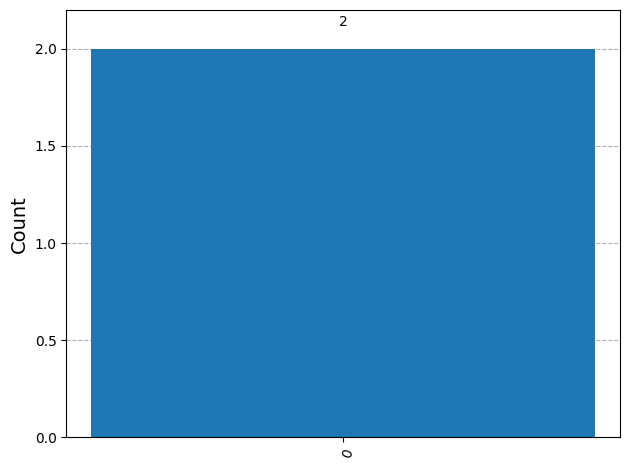

In [63]:

def get_deutsch_oracle(case: int) -> QuantumCircuit:
    """
    Generates the four possible single-quit (n=1) Deutsch Oracles Uf.
    
    The oracle uses 2 qubits: q0 (input |x>) and q1 (ancilla |y>).
    
    Cases 1 and 2 are Constant functions (f(x)=0 or f(x)=1).
    Cases 3 and 4 are Balanced functions (f(x)=x or f(x)=NOT(x)).
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")
    
    # Circuit has 2 qubits, no classical bits needed for the gate definition
    f = QuantumCircuit(2, name=f"U_f{case}") 
    
    if case == 1:
        # Constant f(x) = 0: Uf = I (Identity)
        pass 
    elif case == 2:
        # Constant f(x) = 1: Uf = X on ancilla (q1)
        f.x(1)
    elif case == 3:
        # Balanced f(x) = x: Uf = CNOT (q0 controls q1)
        f.cx(0, 1)
    elif case == 4:
        # Balanced f(x) = NOT(x): Uf = CNOT + X on ancilla (q1)
        f.x(1)
        f.cx(0, 1)
    
    return f.to_gate()

def get_deutsch_josza():
        
    qc_deutsch = QuantumCircuit(2,1)
    qc_deutsch.x(1)
    qc_deutsch.h(0)
    qc_deutsch.h(1)
    oracle = get_deutsch_oracle(1) 
    blackbox = oracle
    blackbox.label = "$U_f$"
    qc_deutsch.compose(blackbox,[0,1], inplace=True)
    qc_deutsch.h(0)
    qc_deutsch.measure(qubit=0, cbit=0)
    return qc_deutsch

qc_deutsch = get_deutsch_josza()

def measure_qc(qc, shots=1000):
    simulator = AerSimulator()
    transpiled = transpile(qc, simulator)
    job  = simulator.run(transpiled, shots=shots)
    result = job.result()
    return result

result = measure_qc(qc_deutsch, shots=2)
counts = result.get_counts(qc_deutsch)
constant_prob = counts.get('0', 0) / sum(counts.values())
balanced_prob = counts.get('1', 0) / sum(counts.values())
if constant_prob > balanced_prob:
    determination = "Constant"
    expected_output = '0'
else:
    determination = "Balanced"
    expected_output = '1'

print(f"Function is likely: **{determination}**")
print(f"Measurement Counts: {counts}")
plot_histogram(counts, title=f"Deutsch-Jozsa Result for Oracle Case")
plot_histogram(counts)
# qc_deutsch.draw('mpl')

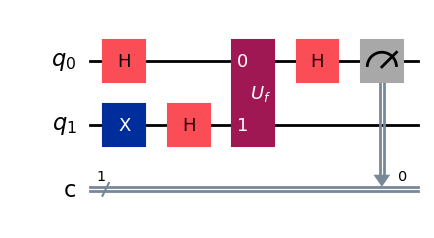

In [47]:
qc_deutsch.draw('mpl')

The above is a version of Deutsch Josza when n=1, so we only have $q_0$ and $q_1$ which is the output bit or ancila. n=1 here means it has one input qubit, so n=n means we'll have n qubits

     ┌───┐     ┌──────────────┐┌───┐┌─┐   
q_0: ┤ H ├─────┤0             ├┤ H ├┤M├───
     ├───┤     │              │├───┤└╥┘┌─┐
q_1: ┤ H ├─────┤1 U_f_const_0 ├┤ H ├─╫─┤M├
     ├───┤┌───┐│              │└───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├┤2             ├──────╫──╫─
     └───┘└───┘└──────────────┘      ║  ║ 
c: 2/════════════════════════════════╩══╩═
                                     0  1 


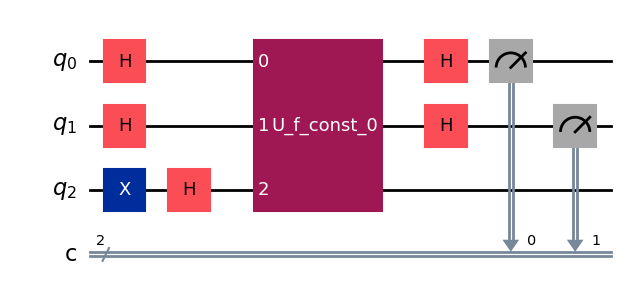

In [66]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import MCMT  # Multi-Controlled Toffoli for Oracles

def get_generalized_deutsch_josza(n: int, oracle_gate: QuantumCircuit.to_gate):
    """
    Constructs the Deutsch-Jozsa circuit for an n-qubit input register.
    
    Args:
        n (int): The number of input qubits.
        oracle_gate (Gate): The n-input, 1-output oracle Uf.
    """
    
    # Circuit needs n input qubits + 1 ancilla qubit, and n classical bits for measurement
    num_qubits = n + 1
    qc_deutsch = QuantumCircuit(num_qubits, n)
    
    # 1. Initialize ancilla qubit (the last qubit, index n) to |-> state
    # This is the Phase Kickback step.
    ancilla_qubit = n
    qc_deutsch.x(ancilla_qubit)
    qc_deutsch.h(ancilla_qubit)
    
    # 2. Initialize n input qubits (q0 to q(n-1)) to |+>^n state
    input_qubits = list(range(n))
    qc_deutsch.h(input_qubits) 
    blackbox = oracle_gate(2)
    # 3. Apply the Oracle (black box Uf)
    # The oracle acts on all n+1 qubits
    qc_deutsch.compose(blackbox, list(range(n+1)), inplace=True)
    
    # 4. Apply final Hadamard gates to the n input qubits
    qc_deutsch.h(input_qubits)
    
    # 5. Measure the n input qubits (q0 to q(n-1)) to n classical bits (c0 to c(n-1))
    qc_deutsch.measure(input_qubits, list(range(n)))
    
    return qc_deutsch

# --- Analysis Principle for n > 1 ---
def analyze_n_result(counts: dict, n: int):
    """
    Determines if the function is constant or balanced from measurement counts.
    """
    # Key result: Constant function guarantees measurement of |0...0> (the '0'*n string).
    # Balanced function guarantees NOT measuring |0...0>.
    
    all_zeros_string = '0' * n
    
    # Probability of measuring the |0...0> state
    prob_constant = counts.get(all_zeros_string, 0) / sum(counts.values())
    
    if prob_constant > 0.99: # Allowing for simulator/hardware noise
        determination = "Constant"
    else:
        determination = "Balanced"
        
    return determination
def get_n_qubit_constant_oracle(n: int) -> QuantumCircuit.to_gate:
    """A constant oracle Uf for n input qubits where f(x) = 0."""
    # This is just an Identity gate on n+1 qubits
    f = QuantumCircuit(n + 1, name="U_f_const_0")
    # No gates needed for f(x)=0 since it's the identity operation on the ancilla.
    return f.to_gate()
qc_deutsch_n = get_generalized_deutsch_josza(2, oracle_gate=get_n_qubit_constant_oracle)
print(qc_deutsch_n)
qc_deutsch_n.draw('mpl')

# Grover's Algorithm

In [67]:
from qiskit.circuit.library import grover_operator, MCMTGate, ZGate

def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states
 
    Here we assume all input marked states have the same number of bits
 
    Parameters:
        marked_states (str or list): Marked states of oracle
 
    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])
 
    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [
            ind
            for ind in range(num_qubits)
            if rev_target.startswith("0", ind)
        ]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        if zero_inds:
            qc.x(zero_inds)
        qc.compose(MCMTGate(ZGate(), num_qubits - 1, 1), inplace=True)
        if zero_inds:
            qc.x(zero_inds)
    return qc

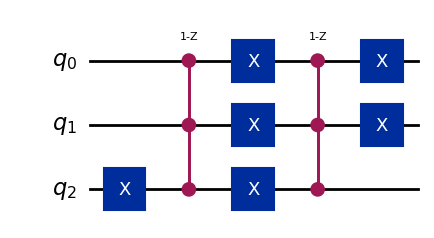

In [68]:
# in 3 qubit, lets' mark 2 of them
marked_states = ["011", "100"]
oracle = grover_oracle(marked_states)
oracle.draw('mpl')

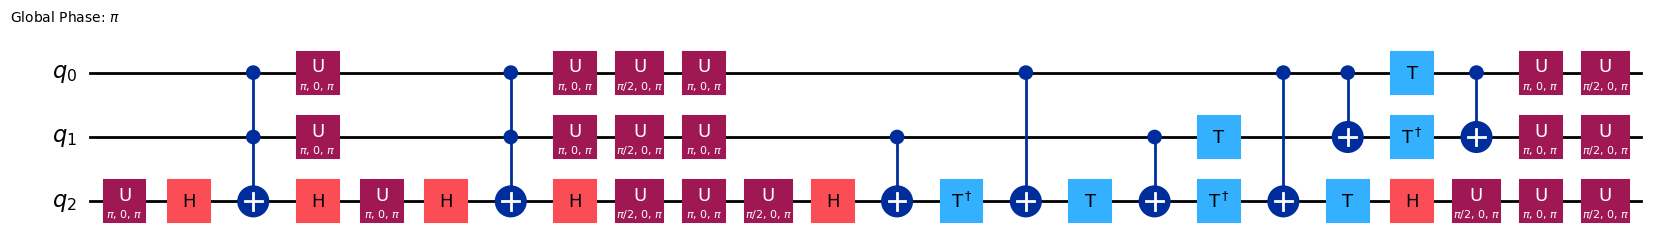

In [69]:
grover_op = grover_operator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

In [72]:
import math
optimal_num_iterations = math.floor(
    math.pi
    / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

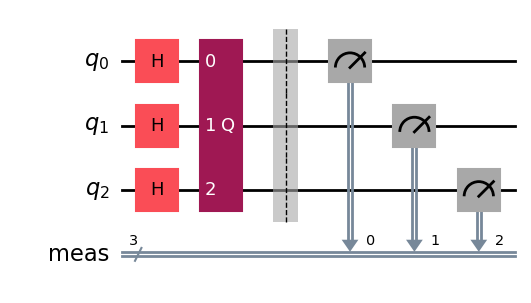

In [73]:
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")